In [1]:
from model import load_model
from image_utils import imagenet_utils
import cv2 ,matplotlib.pyplot as plt
import numpy as np

In [2]:
orig_img,img=imagenet_utils.load_test_img("ILSVRC2012_img_val/ILSVRC2012_val_00000131.JPEG")  # robust architecture


In [3]:
test=load_model('VGG16')

In [4]:
model=test.model
input_dim=test.input_dim
layer_name='block5_conv3'

In [5]:

from explanation_models import gradcam,gradcam_robust,gradcam_plusplus,guided_backprop

# GradCAM

In [6]:
import tensorflow as tf
print(tf.keras.applications.vgg16.decode_predictions(model.predict(img), top=5))

[[('n04252077', 'snowmobile', 0.9774096), ('n03218198', 'dogsled', 0.009926292), ('n04252225', 'snowplow', 0.006640058), ('n03792972', 'mountain_tent', 0.0023471143), ('n04228054', 'ski', 0.0013977047)]]


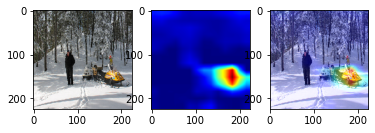

In [7]:
g= gradcam(model,layer_name,input_dim)
heatmap=g.get_heatmap(img)
heatmap_colormap,overlayed_img_gc=imagenet_utils.overlay_heatmap(orig_img,heatmap)
f, axarr = plt.subplots(1,3)
axarr[0].imshow(orig_img)
axarr[1].imshow(heatmap_colormap)
axarr[2].imshow(overlayed_img_gc)

# GradCAM Robust - average

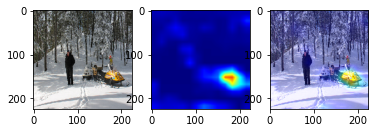

In [8]:
layers=['block5_conv1','block5_conv2','block5_conv3']
g_robust= gradcam_robust(model,layers,input_dim,'GradCAM')
heatmap=g_robust.get_heatmap(img)
final=(heatmap[0]+heatmap[1]+heatmap[2])/3.0
heatmap_colormap,overlayed_img_gc_avg=imagenet_utils.overlay_heatmap(orig_img,final)
f, axarr = plt.subplots(1,3)
axarr[0].imshow(orig_img)
axarr[1].imshow(heatmap_colormap)
axarr[2].imshow(overlayed_img_gc_avg)

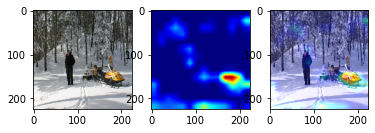

In [9]:
import tensorflow as tf
final=tf.math.maximum(heatmap[0],heatmap[1],heatmap[2])
heatmap_colormap,overlayed_img_gc_max=imagenet_utils.overlay_heatmap(orig_img,final)
f, axarr = plt.subplots(1,3)
axarr[0].imshow(orig_img)
axarr[1].imshow(heatmap_colormap)
axarr[2].imshow(overlayed_img_gc_max)

# GradCAM++

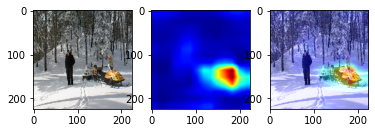

In [10]:
g= gradcam_plusplus(model,layer_name,input_dim)
heatmap=g.get_heatmap(img)
heatmap_colormap,overlayed_img_gcpp=imagenet_utils.overlay_heatmap(orig_img,heatmap)
f, axarr = plt.subplots(1,3)
axarr[0].imshow(orig_img)
axarr[1].imshow(heatmap_colormap)
axarr[2].imshow(overlayed_img_gcpp)

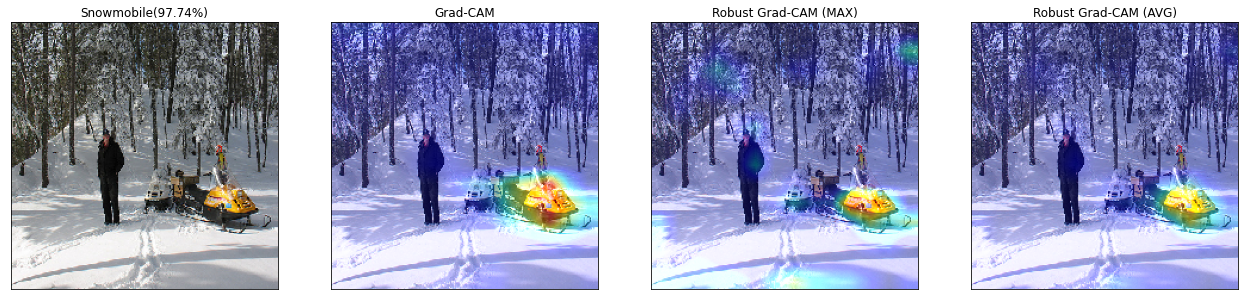

In [14]:
f, axarr = plt.subplots(1,4)
f = plt.gcf()
f.set_size_inches(22,15)
for ax in axarr:
    ax.set_xticks([])
    ax.set_yticks([])
axarr[0].imshow(orig_img)
axarr[0].title.set_text('Snowmobile(97.74%)')
axarr[1].imshow(overlayed_img_gc)
axarr[1].title.set_text('Grad-CAM')
axarr[2].imshow(overlayed_img_gc_max)
axarr[2].title.set_text('Robust Grad-CAM (MAX)')
axarr[3].imshow(overlayed_img_gc_avg)
axarr[3].title.set_text('Robust Grad-CAM (AVG)')
plt.savefig('Results/Robust_architcture_results.jpeg', dpi=200)